In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_two_objects(A, B, Ax, Ay, Bx, By, vertical=False):

    image = np.zeros((32, 32))

    # List of available drawing functions
    draw_functions = [draw_circle, draw_line, draw_x, draw_diagonal]

    # Call the first chosen function
    A(image, Ax, Ay)

    # Call the second chosen function right next to the first
    B(image, Bx, By)

    if vertical:
        image = image.T

    return image


In [ ]:

padding = 4

center_row = np.random.randint(padding, 32 - padding)
center_col = np.random.randint(padding, 32 - padding) 

def draw_circle(image, center_row, center_col, radius=2):
        """Draw a circle on the given image."""
        for r in range(center_row-radius, center_row+radius+1):
            for c in range(center_col-radius, center_col+radius+1):
                if (r - center_row)**2 + (c - center_col)**2 <= radius**2 and 0 <= r < 32 and 0 <= c < 32:
                    image[r, c] = 1
        return image

def draw_line(image, center_row, center_col, line_length=4):
    for i in range(-line_length // 2, line_length // 2 + 1):
        if 0 <= center_row + i < 32 and 0 <= center_col < 32:
            image[center_row + i, center_col] = 1
    return image

def draw_x(image, center_row, center_col, x_length=5):
    # Drawing the X centered around the center_col
# Drawing the X centered around the start_col
    for i in range(x_length):
        image[center_row - x_length // 2 + i, center_col - x_length // 2 + i] = 1
        image[center_row - x_length // 2 + i, center_col + x_length // 2 - i] = 1
    return image


def draw_diagonal(image, center_row, center_col, line_length=4):
    for i in range(-line_length // 2, line_length // 2 + 1):
        if 0 <= center_row + i < 32 and 0 <= center_col + i < 32:
            image[center_row + i, center_col + i] = 1

    return image


In [24]:
draw_circle == draw_line

False

In [37]:
import random

# generate one of each image combo, make sure spacing makes sense
draw_functions = [draw_circle, draw_line, draw_x, draw_diagonal]
padding = 4
offset = 7

images = []
metadata = []

for vertical in [True, False]:
    for a in range(padding, 32 - padding):
        for b in range(padding, 32 - padding - offset):
        
            Ax = a
            Ay = b
            
            Bx = Ax
            By = Ay + offset

            # Example of how to use it:
            for A in draw_functions:
                for B in draw_functions:
                    img = plot_two_objects(A, B, Ax, Ay, Bx, By, vertical=vertical)
                    # plt.imshow(img, cmap='gray')
                    # plt.axis('off')
                    # plt.show()

                    if A == B:
                        same = True
                    else:
                        same = False

                    images.append(img)
                    m = {
                        "Ax": Ax,
                        "Ay": Ay,
                        "Bx": Bx,
                        "By": By,
                        "A": A.__name__,
                        "B": B.__name__,
                        "Same": same,
                        "Vertical": vertical
                    }
                    metadata.append(m)

In [40]:
np.savez('../data/induction/induction_dataset.npz', images=images, metadata=metadata)


13056
13056
{'Ax': 4, 'Ay': 4, 'Bx': 4, 'By': 11, 'A': 'draw_x', 'B': 'draw_diagonal', 'Same': False, 'Vertical': True}


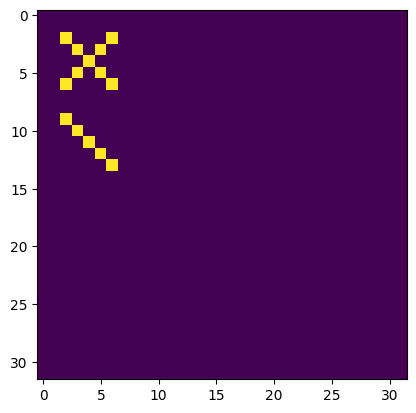

In [39]:
print(len(images))
print(len(metadata))
idx = 11
print(metadata[idx])
plt.figure()
plt.imshow(images[idx])

In [22]:
total_locations = (32 - padding - padding) * (32 - padding - offset -padding)
print("total locations", total_locations)

total_shapes = 4 * 4
total_orientations = 2

print("total points = ", total_locations*total_shapes*total_orientations)

# to create a balanced dataset, balance classes (same and different)

same_shapes = 4
print("total same points = ", total_locations*same_shapes*total_orientations)

# randomly select different points
print("total dataset_size = ", total_locations*same_shapes*total_orientations*2)

total locations 408
total points =  13056
total same points =  3264
total dataset_size =  6528


In [6]:
# create balanced dataset of 4 classes
import numpy as np

# Same - Vertical
# Same - Horizontal
# Different - Vertical
# Different - Horizontal

dataset = np.load('../data/induction/induction_dataset.npz', mmap_mode='r', allow_pickle=True)

In [7]:
images = dataset['images']
metadata = dataset['metadata']

In [8]:
len(images)

13056

In [10]:
metadata[0]

{'Ax': 4,
 'Ay': 4,
 'Bx': 4,
 'By': 11,
 'A': 'draw_circle',
 'B': 'draw_circle',
 'Same': True,
 'Vertical': True}

In [16]:
same_true_vertical_true = [i for i, entry in enumerate(metadata) if entry['Same'] and entry['Vertical']]
same_false_vertical_false = [i for i, entry in enumerate(metadata) if not entry['Same'] and not entry['Vertical']]
same_true_vertical_false = [i for i, entry in enumerate(metadata) if entry['Same'] and not entry['Vertical']]
same_false_vertical_true = [i for i, entry in enumerate(metadata) if not entry['Same'] and entry['Vertical']]


In [17]:
print(len(same_true_vertical_true))
print(len(same_false_vertical_false))
print(len(same_true_vertical_false))
print(len(same_false_vertical_true))

1632
4896
1632
4896


In [19]:
import random
sample_size = len(same_true_vertical_true)
same_false_vertical_false_sampled = random.sample(same_false_vertical_false, sample_size)
same_false_vertical_true_sampled = random.sample(same_false_vertical_true, sample_size)


In [21]:
print(len(same_false_vertical_false_sampled))
print(len(same_false_vertical_true_sampled))

1632
1632


In [ ]:
# Using the indices to obtain the actual data entries
same_true_vertical_true_data = [data[i] for i in same_true_vertical_true]
same_false_vertical_false_data = [data[i] for i in same_false_vertical_false_sampled]
same_true_vertical_false_data = [data[i] for i in same_true_vertical_false]
same_false_vertical_true_data = [data[i] for i in same_false_vertical_true_sampled]


In [22]:
same_true_vertical_true_images = images[same_true_vertical_true]
same_false_vertical_false_images = images[same_false_vertical_false_sampled]
same_true_vertical_false_images = images[same_true_vertical_false]
same_false_vertical_true_images = images[same_false_vertical_true_sampled]

same_true_vertical_true_metadata = metadata[same_true_vertical_true]
same_false_vertical_false_metadata = metadata[same_false_vertical_false_sampled]
same_true_vertical_false_metadata = metadata[same_true_vertical_false]
same_false_vertical_true_metadata = metadata[same_false_vertical_true_sampled]

# 3. Save the datasets into new `.npz` files based on the four conditions
path = '../data/induction'

np.savez(f'{path}/same_T_vertical_T.npz', images=same_true_vertical_true_images, metadata=same_true_vertical_true_metadata)
np.savez(f'{path}/same_F_vertical_F.npz', images=same_false_vertical_false_images, metadata=same_false_vertical_false_metadata)
np.savez(f'{path}/same_T_vertical_F.npz', images=same_true_vertical_false_images, metadata=same_true_vertical_false_metadata)
np.savez(f'{path}/same_F_vertical_T.npz', images=same_false_vertical_true_images, metadata=same_false_vertical_true_metadata)

Dataset ../data/induction/same_T_vertical_T.npz size: 1632


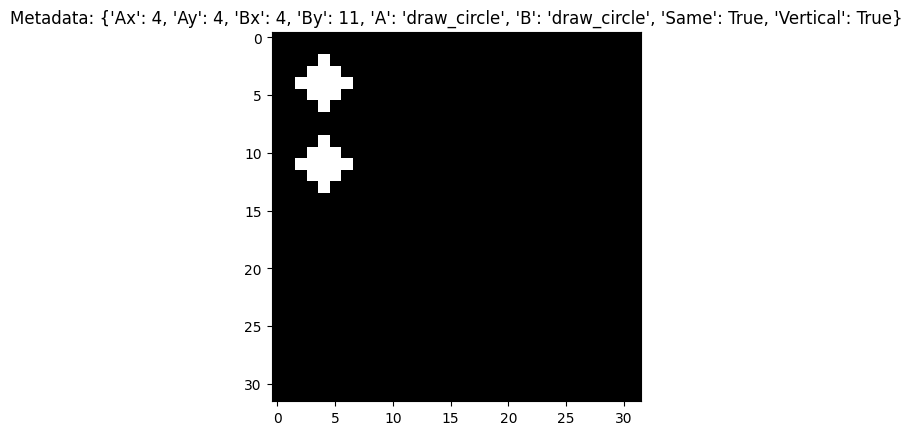

Dataset ../data/induction/same_F_vertical_F.npz size: 1632


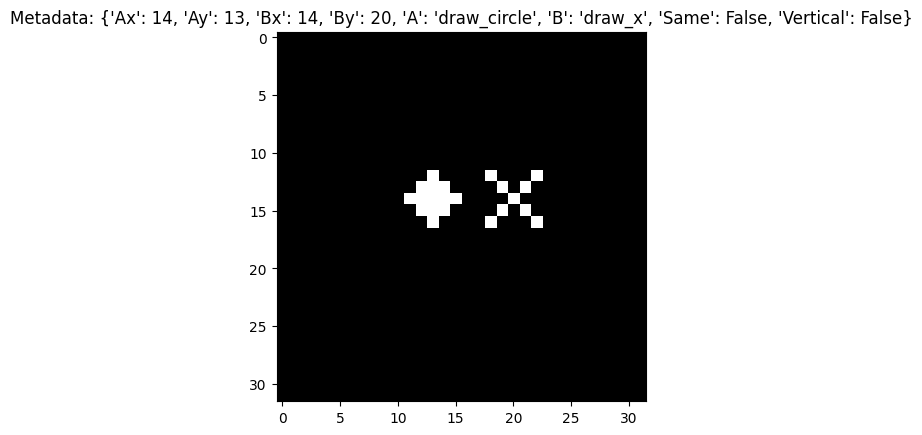

Dataset ../data/induction/same_T_vertical_F.npz size: 1632


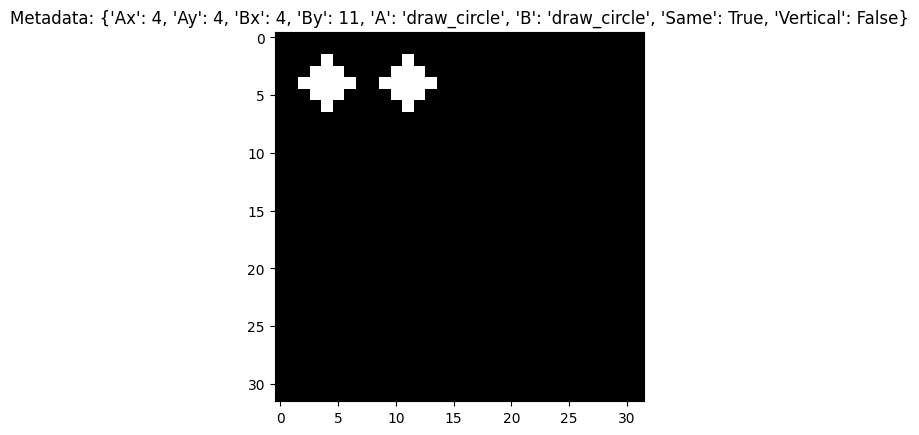

Dataset ../data/induction/same_F_vertical_T.npz size: 1632


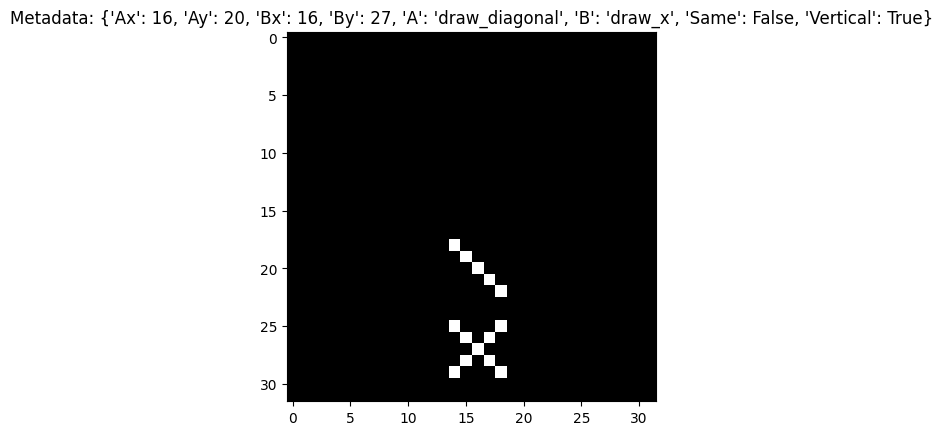

In [24]:
# check for correctness
import numpy as np
import matplotlib.pyplot as plt

def load_and_check(npz_path):
    # Load dataset
    data = np.load(npz_path, allow_pickle=True)
    
    # Extract images and metadata
    images = data['images']
    metadata = data['metadata']
    
    # Print the size
    print(f"Dataset {npz_path} size: {len(images)}")
    
    # Plot a sample image with metadata
    sample_idx = 0  # You can change this to any valid index
    sample_image = images[sample_idx]
    sample_metadata = metadata[sample_idx]
    
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Metadata: {sample_metadata}")
    plt.show()

# Paths to the datasets
dataset_paths = [
    'same_T_vertical_T.npz',
    'same_F_vertical_F.npz',
    'same_T_vertical_F.npz',
    'same_F_vertical_T.npz'
]

dir_path = '../data/induction'
for path in dataset_paths:
    load_and_check(f'{dir_path}/{path}')

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_and_split(npz_path):
    # Load dataset
    data = np.load(npz_path, allow_pickle=True)
    
    # Extract images and metadata
    images = data['images']
    metadata = data['metadata']
    
    # Split into 90/10 training/test split
    train_images, test_images, train_metadata, test_metadata = train_test_split(images, metadata, test_size=0.1, random_state=42)
    
    return train_images, test_images, train_metadata, test_metadata

# Paths to the datasets
dataset_paths = [
    'same_T_vertical_T.npz',
    'same_F_vertical_F.npz',
    'same_T_vertical_F.npz',
    'same_F_vertical_T.npz'
]

all_train_images = []
all_test_images = []
all_train_metadata = []
all_test_metadata = []

for path in dataset_paths:
    train_images, test_images, train_metadata, test_metadata = load_and_split(os.path.join(dir_path, path))
    
    all_train_images.append(train_images)
    all_test_images.append(test_images)
    all_train_metadata.append(train_metadata)
    all_test_metadata.append(test_metadata)

# Concatenate the data
all_train_images = np.concatenate(all_train_images, axis=0)
all_test_images = np.concatenate(all_test_images, axis=0)
all_train_metadata = np.concatenate(all_train_metadata, axis=0)
all_test_metadata = np.concatenate(all_test_metadata, axis=0)

# Save the concatenated datasets into new `.npz` files
np.savez(f'{dir_path}/all_train.npz', images=all_train_images, metadata=all_train_metadata)
np.savez(f'{dir_path}/all_test.npz', images=all_test_images, metadata=all_test_metadata)


In [1]:
from vit_planetarium.dataloaders.induction import InductionDataset

/home/mila/s/sonia.joseph/ViT-Planetarium/env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
dataset = InductionDataset('test')

Loading induction dataset from cache... ../data/induction/all_test.npz


In [24]:
from collections import Counter

labels = [int(dataset[i][1]) for i in range(len(dataset))]  # Assuming label is the second item in the dataset's tuple
unique_classes = set(labels)

print(f"Number of unique classes: {len(unique_classes)}")
Counter(labels)


Number of unique classes: 4


Counter({2: 164, 0: 164, 1: 164, 3: 164})

In [29]:
dataset[0]

(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]),
 tensor(2))

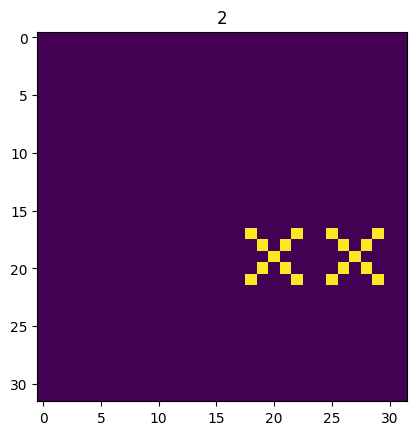

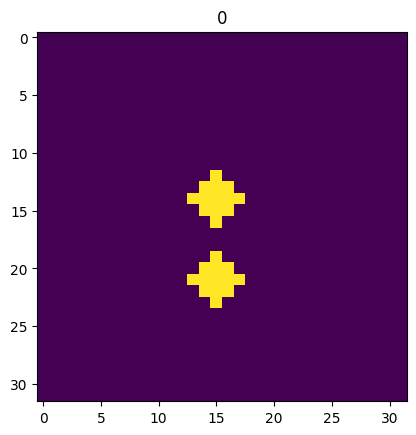

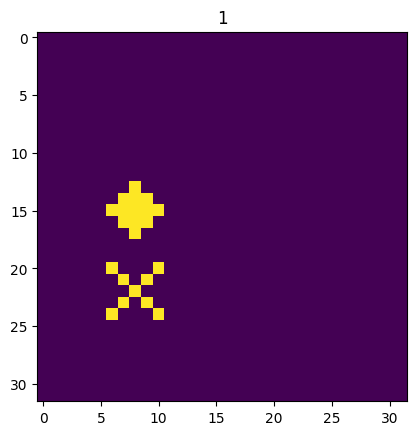

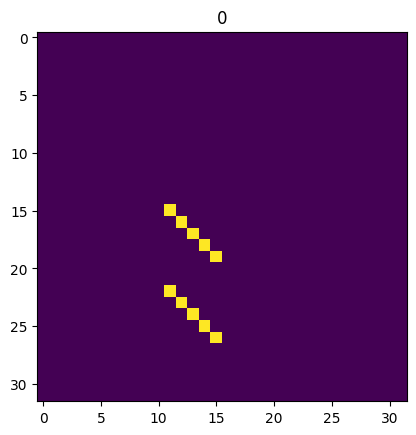

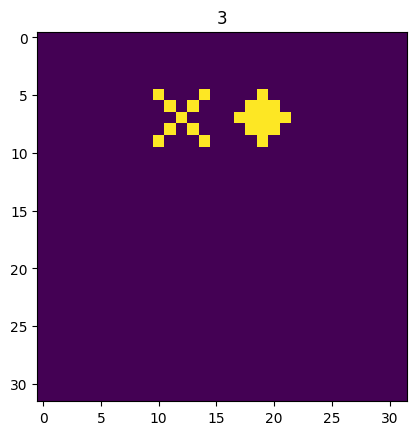

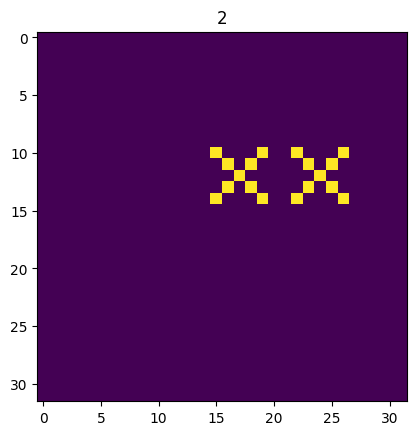

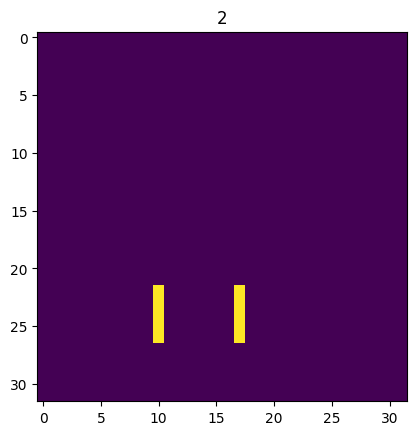

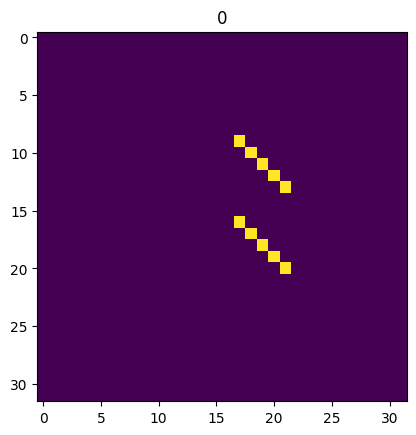

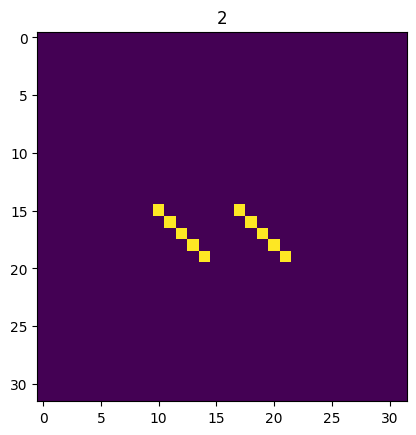

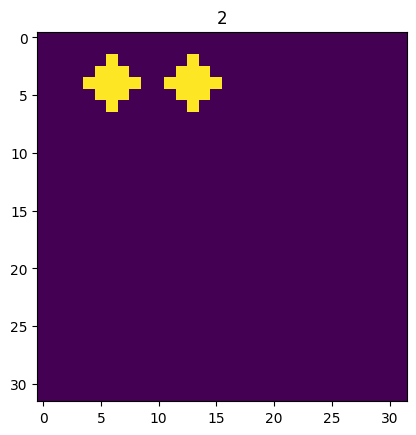

In [36]:
import matplotlib.pyplot as plt 

idx = 0

for idx in range(10):
    plt.figure()
    plt.imshow(dataset[idx][0].permute(1,2,0))
    plt.title(int(dataset[idx][1]))